### Check Mrr for outer-rise, shallow-deep subducting slab before and after the 2004 mainshock

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import ternary # ternary plot has a bug
import plotly.express as px
import h5py
import matplotlib as mpl

# import geopandas as gpd
import math

from matplotlib.patches import Circle, Wedge, Polygon

import os
import matplotlib.patheffects as path_effects


from netCDF4 import Dataset as NetCDFFile 

# for beachball - there are some error with using obspy
from pyrocko.plot import beachball
from pyrocko import moment_tensor as ptm

import cartopy.crs as ccrs
import cartopy.mpl.geoaxes

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
from pathlib import Path
%matplotlib inline

import harmonica as hm

from obspy.core import UTCDateTime

from datetime import datetime, timezone

import seaborn as sns
sns.set()
sns.set_style(style='white') 
sns.set_style("ticks", {"xtick.major.size": 0.5, "ytick.major.size": 0.5})

In [2]:
data = pd.read_csv("/Users/mohd0001/PhD_Monash/Paper2/time-series/data/SUeq_data.csv", header = 'infer')
# data = data[(data['DATE'] > '26-12-1994')]
# data = pd.read_csv('sum_with_2005_eqs.csv', header = 'infer')

data.sort_values(by = 'MW', ascending = False, inplace = True)

data['DATE'] = pd.to_datetime(data['DATE']) # change dtype to datetime format
data['DATE'] = data['DATE'].dt.strftime('%Y-%m-%d') # change dtype to object

# data['DATE'] and data['TIME'] should be object (str) to perform + operator

data_dummy = np.array(data['DATE'] + ' ' + data['TIME'])

data_ev_time = []

for val in data_dummy:
    data_ev_time.append(UTCDateTime(val))

    
ref_date = data_ev_time[0]

data_ev_time = np.array(data_ev_time)

date = []

for val in data_ev_time:
    date.append(val - ref_date)
    
date = np.array(date) # this is in seconds

data['YEARS'] = date/31536000

data = data.sort_values(by ='YEARS', ascending=True) # this is an important step

In [3]:
data_100 = data[(data['P(km)'] > 0) & (data['DEPTH'] > 70) & (data['DEPTH'] < 300)]
data_UP = data_100.loc[data['CLASS'] == 'DGOING']
# data_UP = data_UP[(data_UP['MW'] < 5.5)]
print("Max Mw is:", data_UP['MW'].max())
# print(data_UP['TYPE'].describe())

Max Mw is: 7.6


In [4]:
# In Andaman region 6˚N-15˚N

data_sum = data_UP[(data_UP['LAT'] > 2) & (data_UP['LAT'] < 15)]

data_sum_T = data_sum[(data_sum['MRR'] > 0)]
# data_sum_T = data_sum_T[(data_sum_T['TYPE'] == 'THRUST') | (data_sum_T['TYPE'] == 'O_THRUST')]

data_sum_N = data_sum[(data_sum['MRR'] < 0)]
# data_sum_N = data_sum_N[(data_sum_N['TYPE'] == 'NORM')]

# data_sum_S = data_sum[(data_sum['MRR'] < 0)]
data_sum_S = data_sum[(data_sum['TYPE'] == 'SS')]

andamanMrrT_exp = np.asarray(data_sum_T['EX'])
andamanMrrT_mo = np.asarray(data_sum_T['MRR'])
andamanMrrT_time = np.asarray(data_sum_T['YEARS'])
andamanMrrT_energy = andamanMrrT_mo*np.power(10., andamanMrrT_exp)
# andamanMrrT_energy_mean = np.average(andamanMrrT_energy, )
andamanMrrT_energy_cum = np.cumsum(andamanMrrT_energy)

andamanMrrN_exp = np.asarray(data_sum_N['EX'])
andamanMrrN_mo = np.asarray(data_sum_N['MRR'])
andamanMrrN_time = np.asarray(data_sum_N['YEARS'])
andamanMrrN_energy = andamanMrrN_mo*np.power(10., andamanMrrN_exp)
andamanMrrN_energy_cum = np.cumsum(andamanMrrN_energy)

### Mo ###
andamanMoT_exp = np.asarray(data_sum_T['EX'])
andamanMoT_mo = np.asarray(data_sum_T['MO'])
andamanMoT_time = np.asarray(data_sum_T['YEARS'])
andamanMoT_energy = andamanMoT_mo*np.power(10., andamanMoT_exp)
andamanMoT_energy_cum = np.cumsum(andamanMoT_energy)

andamanMoN_exp = np.asarray(data_sum_N['EX'])
andamanMoN_mo = np.asarray(data_sum_N['MO'])
andamanMoN_time = np.asarray(data_sum_N['YEARS'])
andamanMoN_energy = andamanMoN_mo*np.power(10., andamanMoN_exp)
andamanMoN_energy_cum = np.cumsum(andamanMoN_energy)

andamanMoS_exp = np.asarray(data_sum_S['EX'])
andamanMoS_mo = np.asarray(data_sum_S['MO'])
andamanMoS_time = np.asarray(data_sum_S['YEARS'])
andamanMoS_energy = andamanMoS_mo*np.power(10., andamanMoS_exp)
andamanMoS_energy_cum = np.cumsum(andamanMoS_energy)

In [7]:
# West Sumatra 0-6˚N region
data_sum = data_UP[(data_UP['LAT'] > -3) & (data_UP['LAT'] < 6)]
# data_sum = data_UP[(data_UP['LAT'] < -6) & (data_UP['LON'] < 115)]

data_sum_T = data_sum[(data_sum['MRR'] > 0)]
# data_sum_T = data_sum_T[(data_sum_T['TYPE'] == 'THRUST') | (data_sum_T['TYPE'] == 'O_THRUST')]

data_sum_N = data_sum[(data_sum['MRR'] < 0)]
# data_sum_N = data_sum_N[(data_sum_N['TYPE'] == 'NORM')]

# data_sum_N = data_sum[(data_sum['MRR'] < 0)]
data_sum_S = data_sum[(data_sum['TYPE'] == 'SS')]

west_sumMrrT_exp = np.asarray(data_sum_T['EX'])
west_sumMrrT_mo = np.asarray(data_sum_T['MRR'])
west_sumMrrT_time = np.asarray(data_sum_T['YEARS'])
west_sumMrrT_energy = west_sumMrrT_mo*np.power(10., west_sumMrrT_exp)
# west_sumMrrT_energy_mean = np.average(west_sumMrrT_energy, )
west_sumMrrT_energy_cum = np.cumsum(west_sumMrrT_energy)

west_sumMrrN_exp = np.asarray(data_sum_N['EX'])
west_sumMrrN_mo = np.asarray(data_sum_N['MRR'])
west_sumMrrN_time = np.asarray(data_sum_N['YEARS'])
west_sumMrrN_energy = west_sumMrrN_mo*np.power(10., west_sumMrrN_exp)
west_sumMrrN_energy_cum = np.cumsum(west_sumMrrN_energy)

### Mo ###
west_sumMoT_exp = np.asarray(data_sum_T['EX'])
west_sumMoT_mo = np.asarray(data_sum_T['MO'])
west_sumMoT_time = np.asarray(data_sum_T['YEARS'])
west_sumMoT_energy = west_sumMoT_mo*np.power(10., west_sumMoT_exp)
west_sumMoT_energy_cum = np.cumsum(west_sumMoT_energy)

west_sumMoN_exp = np.asarray(data_sum_N['EX'])
west_sumMoN_mo = np.asarray(data_sum_N['MO'])
west_sumMoN_time = np.asarray(data_sum_N['YEARS'])
west_sumMoN_energy = west_sumMoN_mo*np.power(10., west_sumMoN_exp)
west_sumMoN_energy_cum = np.cumsum(west_sumMoN_energy)

west_sumMoS_exp = np.asarray(data_sum_S['EX'])
west_sumMoS_mo = np.asarray(data_sum_S['MO'])
west_sumMoS_time = np.asarray(data_sum_S['YEARS'])
west_sumMoS_energy = west_sumMoS_mo*np.power(10., west_sumMoS_exp)
west_sumMoS_energy_cum = np.cumsum(west_sumMoS_energy)

In [8]:
# In East Sumatra and Java region 3˚S-12˚S and < 115˚E

data_sum = data_UP[(data_UP['LAT'] < -3) & (data_UP['LON'] < 115)]

data_sum_T = data_sum[(data_sum['MRR'] > 0)]
# data_sum_T = data_sum_T[(data_sum_T['TYPE'] == 'THRUST') | (data_sum_T['TYPE'] == 'O_THRUST')]

data_sum_N = data_sum[(data_sum['MRR'] < 0)]
# data_sum_N = data_sum_N[(data_sum_N['TYPE'] == 'NORM')]

# data_sum_N = data_sum[(data_sum['MRR'] < 0)]
data_sum_S = data_sum[(data_sum['TYPE'] == 'SS')]

south_sumJavaMrrT_exp = np.asarray(data_sum_T['EX'])
south_sumJavaMrrT_mo = np.asarray(data_sum_T['MRR'])
south_sumJavaMrrT_time = np.asarray(data_sum_T['YEARS'])
south_sumJavaMrrT_energy = south_sumJavaMrrT_mo*np.power(10., south_sumJavaMrrT_exp)
# south_sumJavaMrrT_energy_mean = np.average(south_sumJavaMrrT_energy, )
south_sumJavaMrrT_energy_cum = np.cumsum(south_sumJavaMrrT_energy)

south_sumJavaMrrN_exp = np.asarray(data_sum_N['EX'])
south_sumJavaMrrN_mo = np.asarray(data_sum_N['MRR'])
south_sumJavaMrrN_time = np.asarray(data_sum_N['YEARS'])
south_sumJavaMrrN_energy = south_sumJavaMrrN_mo*np.power(10., south_sumJavaMrrN_exp)
south_sumJavaMrrN_energy_cum = np.cumsum(south_sumJavaMrrN_energy)

### Mo ###
south_sumJavaMoT_exp = np.asarray(data_sum_T['EX'])
south_sumJavaMoT_mo = np.asarray(data_sum_T['MO'])
south_sumJavaMoT_time = np.asarray(data_sum_T['YEARS'])
south_sumJavaMoT_energy = south_sumJavaMoT_mo*np.power(10., south_sumJavaMoT_exp)
south_sumJavaMoT_energy_cum = np.cumsum(south_sumJavaMoT_energy)

south_sumJavaMoN_exp = np.asarray(data_sum_N['EX'])
south_sumJavaMoN_mo = np.asarray(data_sum_N['MO'])
south_sumJavaMoN_time = np.asarray(data_sum_N['YEARS'])
south_sumJavaMoN_energy = south_sumJavaMoN_mo*np.power(10., south_sumJavaMoN_exp)
south_sumJavaMoN_energy_cum = np.cumsum(south_sumJavaMoN_energy)

south_sumJavaMoS_exp = np.asarray(data_sum_S['EX'])
south_sumJavaMoS_mo = np.asarray(data_sum_S['MO'])
south_sumJavaMoS_time = np.asarray(data_sum_S['YEARS'])
south_sumJavaMoS_energy = south_sumJavaMoS_mo*np.power(10., south_sumJavaMoS_exp)
south_sumJavaMoS_energy_cum = np.cumsum(south_sumJavaMoS_energy)

Text(-8.8, 7e+17, 'East Sumatra-Java (3˚S-12˚S)')

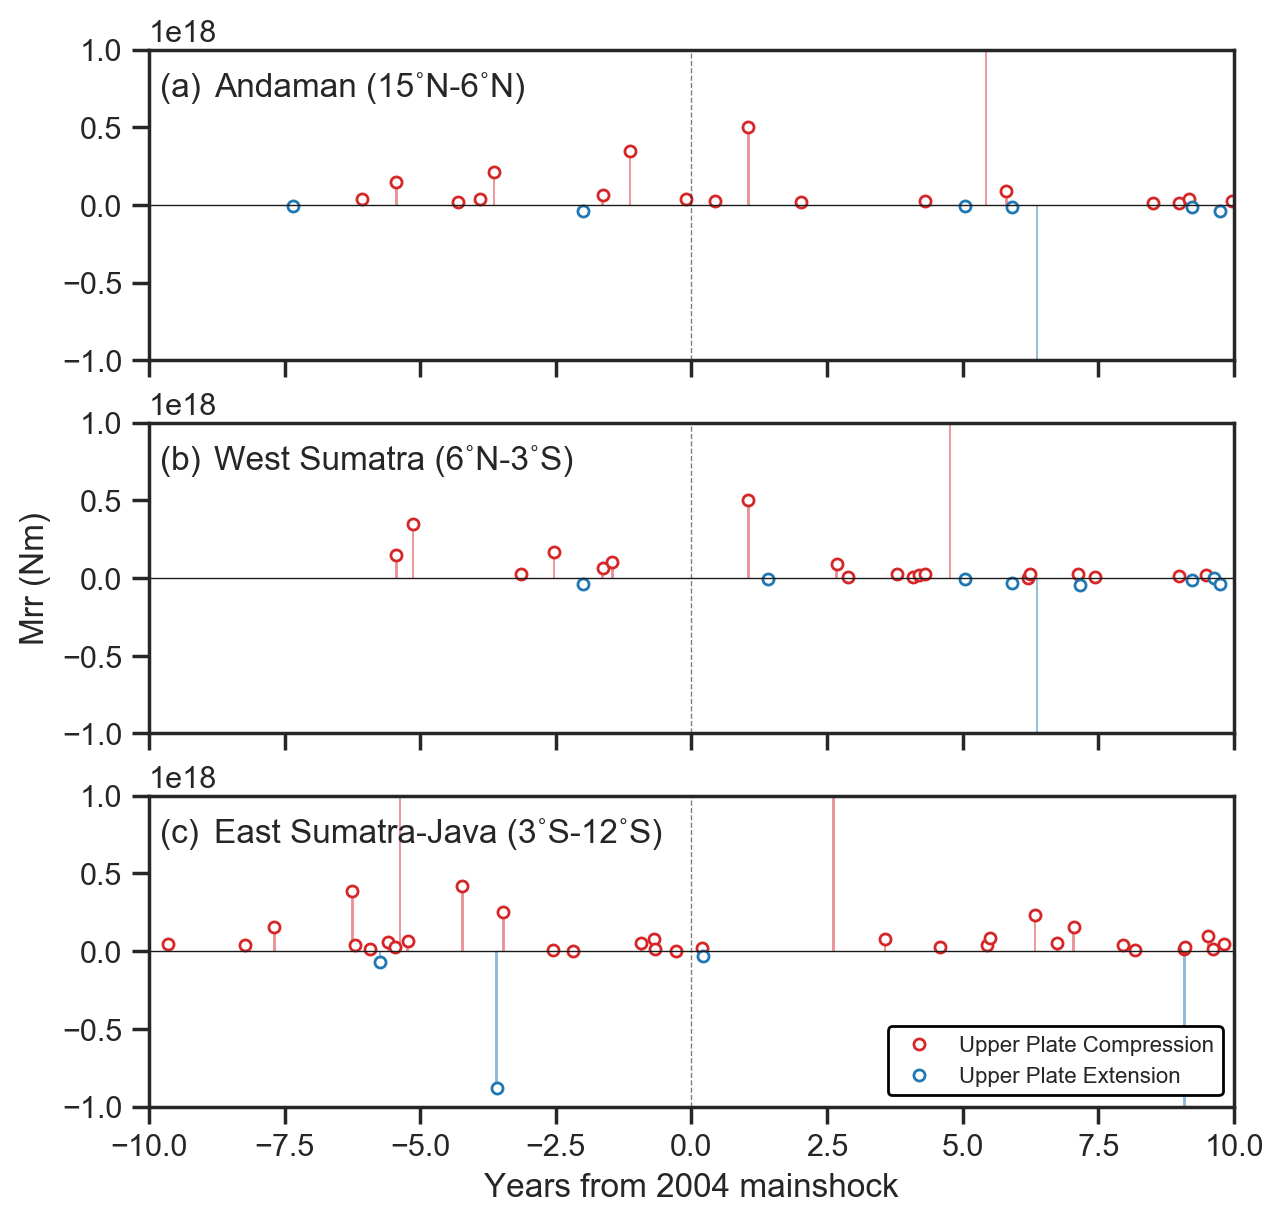

In [9]:
figsize = (7,7)
dpi=200

fig, ax = plt.subplots(3, 1, dpi=dpi, figsize = figsize, sharex= True)

xlimit = [-10, 10]
ylimit = [-1e18, 1e18]


fig1=ax[0]

fig1.bar(andamanMrrT_time, andamanMrrT_energy,
        linewidth = 0.1, color = 'tab:red', width = 0.05, alpha = 0.5)
fig1.plot(andamanMrrT_time, andamanMrrT_energy, 'o',
         markersize = 4, color = 'tab:red', label = 'Upper Plate Compression', markerfacecolor = 'white')

fig1.bar(andamanMrrN_time, andamanMrrN_energy,
        linewidth = 0.1, color = 'tab:blue', width = 0.05, alpha = 0.5)
fig1.plot(andamanMrrN_time, andamanMrrN_energy, 'o',
         markersize = 4, color = 'tab:blue', label = 'Upper Plate Extension', markerfacecolor = 'white')


fig1.axhline(y = 0, color = 'k', linestyle = '-', linewidth = 0.5)
fig1.axvline(color="black", lw=0.5, ls='--', alpha=0.5)

fig1.set_xlim(xlimit)
fig1.set_ylim(ylimit)
fig1.set_ylabel(r'Mrr (N-m)')

# x0, xmax = fig1.set_xlim()
# y0, ymax = fig1.set_ylim()
# data_width = xmax - x0
# data_height = ymax - y0
# fig1.text(x0 + data_width*0.01, y0 + data_height * 0.85, '(a)')
# fig1.text(x0 + data_width*0.06, y0 + data_height * 0.85, 'Andaman (15˚N-6˚N)')


###############################################
# fig[1] = fig.set_figheight(figheight)

fig2=ax[1]

fig2.bar(west_sumMrrT_time, west_sumMrrT_energy,
        linewidth = 0.1, color = 'tab:red', width = 0.05, alpha = 0.5)
fig2.plot(west_sumMrrT_time, west_sumMrrT_energy, 'o',
         markersize = 4, color = 'tab:red', label = 'Upper Plate Compression', markerfacecolor = 'white')

fig2.bar(west_sumMrrN_time, west_sumMrrN_energy,
        linewidth = 0.1, color = 'tab:blue', width = 0.05, alpha = 0.5)
fig2.plot(west_sumMrrN_time, west_sumMrrN_energy, 'o',
         markersize = 4, color = 'tab:blue', label = 'Upper Plate Extension', markerfacecolor = 'white')


fig2.axhline(y = 0, color = 'k', linestyle = '-', linewidth = 0.5)
fig2.axvline(color="black", lw=0.5, ls='--', alpha=0.5)

fig2.set_xlim(xlimit)
fig2.set_ylim(ylimit)
fig2.set_ylabel(r'Mrr (Nm)')

# x0, xmax = fig2.set_xlim()
# y0, ymax = fig2.set_ylim()
# data_width = xmax - x0
# data_height = ymax - y0
# fig2.text(x0 + data_width*0.01, y0 + data_height * 0.85, '(b)')
# fig2.text(x0 + data_width*0.06, y0 + data_height * 0.85, 'West Sumatra (6˚N-3˚S)')

###########################################
# fig[2] = fig.set_figheight(figheight)

fig3=ax[2]

fig3.bar(south_sumJavaMrrT_time, south_sumJavaMrrT_energy,
        linewidth = 0.1, color = 'tab:red', width = 0.05, alpha = 0.5)
fig3.plot(south_sumJavaMrrT_time, south_sumJavaMrrT_energy, 'o',
         markersize = 4, color = 'tab:red', label = 'Upper Plate Compression', markerfacecolor = 'white')

fig3.bar(south_sumJavaMrrN_time, south_sumJavaMrrN_energy,
        linewidth = 0.1, color = 'tab:blue', width = 0.05, alpha = 0.5)
fig3.plot(south_sumJavaMrrN_time, south_sumJavaMrrN_energy, 'o',
         markersize = 4, color = 'tab:blue', label = 'Upper Plate Extension', markerfacecolor = 'white')

fig3.axhline(y = 0, color = 'k', linestyle = '-', linewidth = 0.5)
fig3.axvline(color="black", lw=0.5, ls='--', alpha=0.5)

fig3.set_xlim(xlimit)
fig3.set_ylim(ylimit)
# fig3.set_title('Sumatra backarc', fontsize=12)

# fig1.set_yscale('log')
# fig2.set_yscale('log')
# fig3.set_yscale('log')

fig3.set_xlabel('Years from 2004 mainshock')
# fig3.set_ylabel(r'Mrr (Nm)')

fig3.legend(loc='lower right',
            fontsize=8,
            facecolor="white",
            edgecolor="black",
            framealpha=1,
            markerscale=1)

# x0, xmax = fig3.set_xlim()
# y0, ymax = fig3.set_ylim()
# data_width = xmax - x0
# data_height = ymax - y0
# fig3.text(x0 + data_width*0.01, y0 + data_height * 0.85, '(c)')
# fig3.text(x0 + data_width*0.06, y0 + data_height * 0.85, 'East Sumatra-Java (3˚S-12˚S)')

# plt.savefig("/Users/mohd0001/PhD_Monash/Paper2/output/timeSeriesMrr_UP.png",
#             dpi = 300, transparent= True, bbox_inches='tight')

## Mo vs time series

/Users/mohd0001/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
/Users/mohd0001/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: MatplotlibDeprecationWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
/Users/mohd0001/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:114: MatplotlibDeprecationWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
/Users/mohd0001/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:138: MatplotlibDeprecationWarning: Saw k

Text(-6.16, 2.51268012e+20, 'East Sumatra-Java (3˚S-12˚S)')

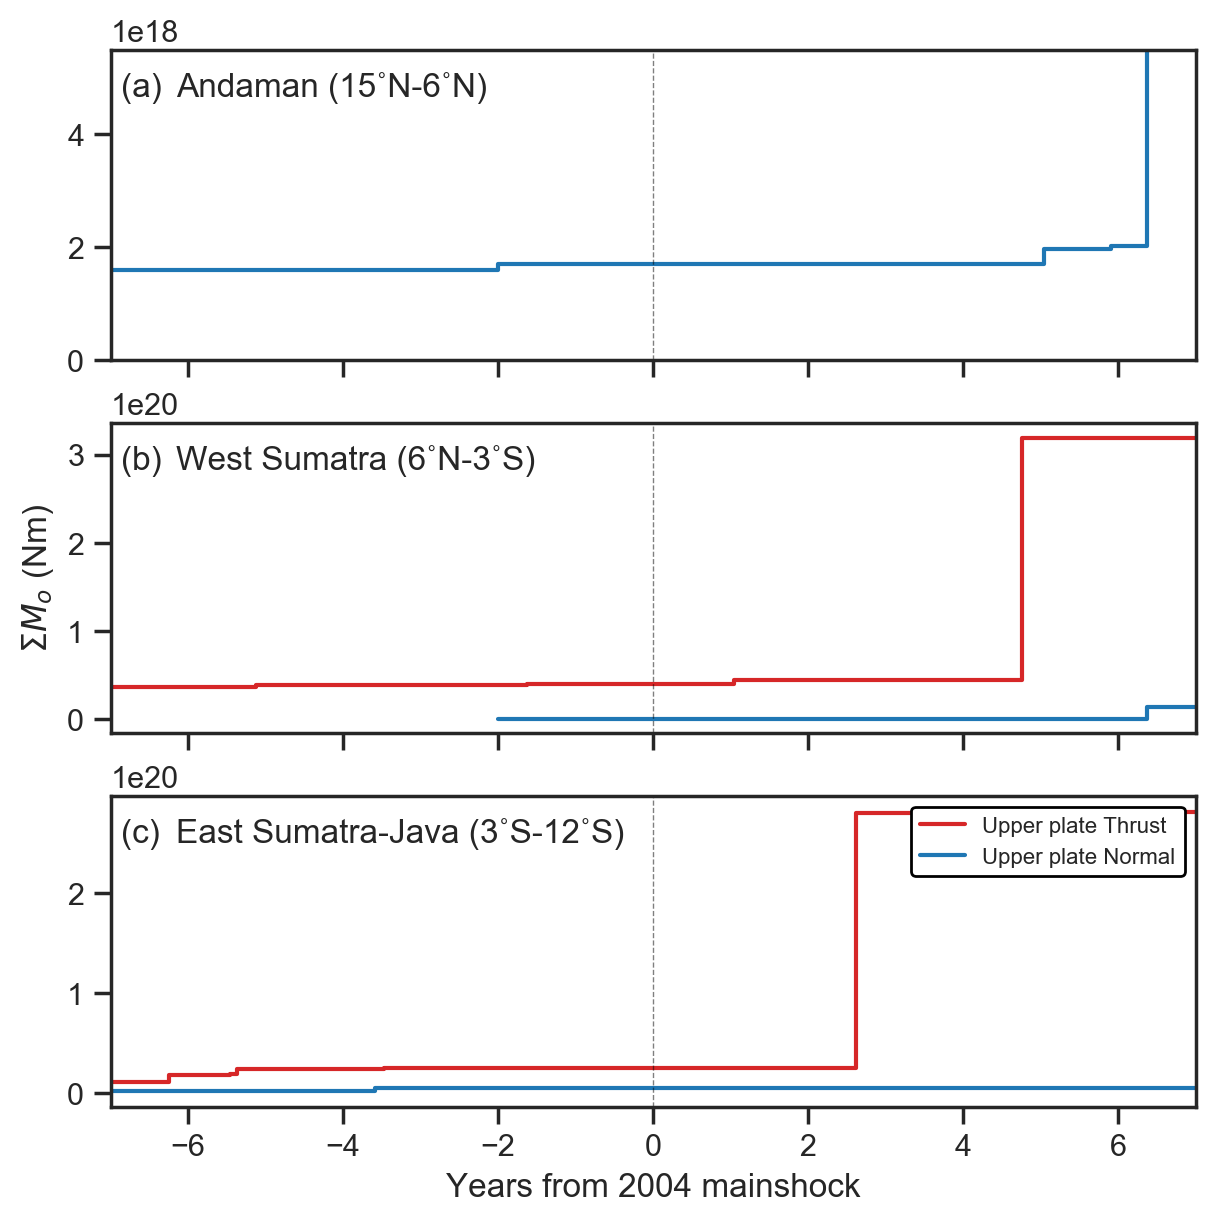

In [10]:
width = 1
xlimit = [-7, 7]
ylimit = [0e18, 5.5e18]

fig, ax = plt.subplots(3, 1, dpi=dpi, figsize = figsize, sharex= True)

#######################################################
fig1=ax[0]

#############
## the x value
new_t = []
for i, s in enumerate(andamanMoN_time):
    new_t.append(s)
    if i != 0:
        new_t.append(s)
    
# the y value
new_y = []
for i, s in enumerate(andamanMoN_energy_cum):
    if i != 0:
        new_y.append(andamanMoN_energy_cum[i-1])
        new_y.append(s)
    else:
        new_y.append(s)
last_t = new_t[-1] #### This is because we need to extend the data for a horizontal line

fig1.plot(new_t, new_y, '-', markersize = 7, linewidth=1.5, color = 'tab:blue', alpha=1, label='Upper Plate Normal',
         mfc = 'blue', mew = 0.8, lw = 0.8)

## the x value
new_t = []
for i, s in enumerate(andamanMoT_time):
    new_t.append(s)
    if i != 0:
        new_t.append(s)
    
# the y value
new_y = []
for i, s in enumerate(andamanMoT_energy_cum):
    if i != 0:
        new_y.append(andamanMoT_energy_cum[i-1])
        new_y.append(s)
    else:
        new_y.append(s)
        
last_y = new_y[-1] #### These 3 lines of code are because we need to extend the data for a horizontal line
new_t.append(last_t)
new_y.append(last_y)    
        
fig1.plot(new_t, new_y, '-', markersize = 7, linewidth=1.5, color = 'tab:red', alpha=1, label='Upper Plate Thrust',
         mfc = 'red', mew = 0.8, lw = 0.8)


###############
# ## the x value
# new_t = []
# for i, s in enumerate(andamanMoS_time):
#     new_t.append(s)
#     if i != 0:
#         new_t.append(s)
    
# # the y value
# new_y = []
# for i, s in enumerate(andamanMoS_energy_cum):
#     if i != 0:
#         new_y.append(andamanMoS_energy_cum[i-1])
#         new_y.append(s)
#     else:
#         new_y.append(s)

# fig1.plot(new_t, new_y, '-', markersize = 7, linewidth=1.5, color = 'tab:brown', alpha=1, label='Upper Plate Strike-Slip',
#          mfc = 'blue', mew = 0.8, lw = 0.8)


# fig2.axhline(y = 0, color = 'k', linestyle = '-', linewidth = 0.5)
fig1.axvline(color="black", lw=0.5, ls='--', alpha=0.5)
# axvline(color="black", label='2004 Mainshock', lw=0.5, ls='--', alpha=0.5)


fig1.set_xlim(xlimit)
# fig1.set_ylim(0e18, 4e18)
fig1.set_ylim(ylimit)

x0, xmax = fig1.set_xlim()
y0, ymax = fig1.set_ylim()
data_width = xmax - x0
data_height = ymax - y0
fig1.text(x0 + data_width*0.01, y0 + data_height * 0.85, '(a)')
fig1.text(x0 + data_width*0.06, y0 + data_height * 0.85, 'Andaman (15˚N-6˚N)')


#####################################################
fig2=ax[1]

## the x value
new_t = []
for i, s in enumerate(west_sumMoT_time):
    new_t.append(s)
    if i != 0:
        new_t.append(s)
    
# the y value
new_y = []
for i, s in enumerate(west_sumMoT_energy_cum):
    if i != 0:
        new_y.append(west_sumMoT_energy_cum[i-1])
        new_y.append(s)
    else:
        new_y.append(s)

last_t = new_t[-1]
fig2.plot(new_t, new_y, '-', markersize = 7, linewidth=1.5, color = 'tab:red', alpha=1, label='Intraslab Normal',
         mfc = 'red', mew = 0.8, lw = 0.8)
#################

## the x value
new_t = []
for i, s in enumerate(west_sumMoN_time):
    new_t.append(s)
    if i != 0:
        new_t.append(s)
    
# the y value
new_y = []
for i, s in enumerate(west_sumMoN_energy_cum):
    if i != 0:
        new_y.append(west_sumMoN_energy_cum[i-1])
        new_y.append(s)
    else:
        new_y.append(s)

last_y = new_y[-1]
new_t.append(last_t)
new_y.append(last_y) 

fig2.plot(new_t, new_y, '-', markersize = 7, linewidth=1.5, color = 'tab:blue', alpha=1, label='Intraslab Normal',
         mfc = 'blue', mew = 0.8, lw = 0.8)
###################

# ## the x value
# new_t = []
# for i, s in enumerate(west_sumMoS_time):
#     new_t.append(s)
#     if i != 0:
#         new_t.append(s)
    
# # the y value
# new_y = []
# for i, s in enumerate(west_sumMoS_energy_cum):
#     if i != 0:
#         new_y.append(west_sumMoS_energy_cum[i-1])
#         new_y.append(s)
#     else:
#         new_y.append(s)

# fig2.plot(new_t, new_y, '-', markersize = 7, linewidth=1.5, color = 'tab:brown', alpha=1, label='Intraslab Normal',
#          mfc = 'brown', mew = 0.8, lw = 0.8)


# fig2.axhline(y = 0, color = 'k', linestyle = '-', linewidth = 0.5)
fig2.axvline(color="black", lw=0.5, ls='--', alpha=0.5)

fig2.set_xlim(xlimit)
# fig2.set_ylim(0e18, 1e18)
# fig2.set_ylim(ylimit)

fig2.set_ylabel(r'$\Sigma M_o$ (Nm)')

x0, xmax = fig2.set_xlim()
y0, ymax = fig2.set_ylim()
data_width = xmax - x0
data_height = ymax - y0
fig2.text(x0 + data_width*0.01, y0 + data_height * 0.85, '(b)')
fig2.text(x0 + data_width*0.06, y0 + data_height * 0.85, 'West Sumatra (6˚N-3˚S)')
                
##############################################################
fig3=ax[2]

## the x value
new_t = []
for i, s in enumerate(south_sumJavaMoT_time):
    new_t.append(s)
    if i != 0:
        new_t.append(s)
    
# the y value
new_y = []
for i, s in enumerate(south_sumJavaMoT_energy_cum):
    if i != 0:
        new_y.append(south_sumJavaMoT_energy_cum[i-1])
        new_y.append(s)
    else:
        new_y.append(s)
last_t = new_t[-1]
        
fig3.plot(new_t, new_y, '-', markersize = 7, linewidth=1.5, color = 'tab:red', alpha=1, label='Upper plate Thrust',
         mfc = 'red', mew = 0.8, lw = 0.8)
##########################
## the x value
new_t = []
for i, s in enumerate(south_sumJavaMoN_time):
    new_t.append(s)
    if i != 0:
        new_t.append(s)
    
# the y value
new_y = []
for i, s in enumerate(south_sumJavaMoN_energy_cum):
    if i != 0:
        new_y.append(south_sumJavaMoN_energy_cum[i-1])
        new_y.append(s)
    else:
        new_y.append(s)

last_y = new_y[-1]
new_t.append(last_t)
new_y.append(last_y) 

fig3.plot(new_t, new_y, '-', markersize = 7, linewidth=1.5, color = 'tab:blue', alpha=1, label='Upper plate Normal',
         mfc = 'blue', mew = 0.8, lw = 0.8)
#############################
# ## the x value
# new_t = []
# for i, s in enumerate(south_sumJavaMoS_time):
#     new_t.append(s)
#     if i != 0:
#         new_t.append(s)
    
# # the y value
# new_y = []
# for i, s in enumerate(south_sumJavaMoS_energy_cum):
#     if i != 0:
#         new_y.append(south_sumJavaMoS_energy_cum[i-1])
#         new_y.append(s)
#     else:
#         new_y.append(s)

# fig3.plot(new_t, new_y, '-', markersize = 7, linewidth=1.5, color = 'tab:brown', alpha=1, label='Upper plate Normal',
#          mfc = 'brown', mew = 0.8, lw = 0.8)

# fig3.axhline(y = 0, color = 'k', linestyle = '-', linewidth = 0.5)
fig3.axvline(color="black", lw=0.5, ls='--', alpha=0.5)

fig3.set_xlim(xlimit)
# fig2.set_ylim(0e18, 1e18)
# fig3.set_ylim(ylimit)

fig3.legend(loc = 'upper right',
            fontsize = 8,
            facecolor="white",
            edgecolor="black",
            framealpha=1,
            markerscale=1)


fig3.set_xlabel('Years from 2004 mainshock')

x0, xmax = fig3.set_xlim()
y0, ymax = fig3.set_ylim()
data_width = xmax - x0
data_height = ymax - y0
fig3.text(x0 + data_width*0.01, y0 + data_height * 0.85, '(c)')
fig3.text(x0 + data_width*0.06, y0 + data_height * 0.85, 'East Sumatra-Java (3˚S-12˚S)')

# plt.savefig("/Users/mohd0001/PhD_Monash/Paper2/output/timeSeries_CumMO_UP.png",
#             dpi = 300, transparent= True, bbox_inches='tight')

In [11]:
new_t = []
for i, s in enumerate(andamanMoN_time):
    new_t.append(s)
    if i != 0:
        new_t.append(s)
    
# the y value
new_y = []
for i, s in enumerate(andamanMoN_energy_cum):
    if i != 0:
        new_y.append(andamanMoN_energy_cum[i-1])
        new_y.append(s)
    else:
        new_y.append(s)

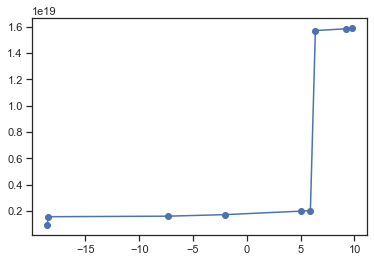

In [12]:
plt.plot(andamanMoN_time, andamanMoN_energy_cum, 'o-')
# plt.xlim([-10, 10])

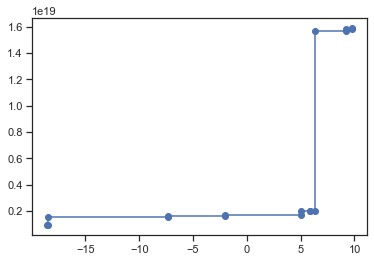

In [13]:
plt.plot(new_t, new_y, 'o-')
# plt.xlim([-10, 10])